# Logistic Regression Exercise

Now it's your turn to implement logistic regression on a new data set. For this purpose we use the Titanic Dataset. It includes personal information of all passengers on the Titanic as well as they survived the sinking of the Titanic or died.

Here’s the **Data Dictionary** of the dataset:

- PassengerID: type should be integers

- Survived: survived or not

- Pclass: class of Travel of every passenger

- Name: the name of the passenger

- Sex: gender

- Age: age of passengers

- SibSp: No. of siblings/spouse aboard

- Parch: No. of parent/child aboard

- Ticket: Ticket number

- Fare: what Prices they paid

- Cabin: cabin number

- Embarked: the port in which a passenger has embarked.

        - C: Cherbourg , S: Southampton , Q: Queenstown


You will find the data in the data folder (it's a zip folder, so you first have to unzip it).


## What you should do:

- conduct a brief EDA to become familiar with the data
- use Logistic Regression to predict if a passenger died or not

## How to do it:

Time is short, so aim for the simplest viable product first:
1. Load the data

2. Separate features and target 

3. Split the data in train and test

3. Get a quick overview of the train data

4. Agree on a classification metric for the task 

5. Create a simple heuristic/educated guess for the classification first. This is called a "baseline model". It is used to compare more complex models later (in this case: logistic regression). You as a data scientist want to prove how much your work/ML could improve the business metric, therefore you need a baseline model for comparison. In some cases you want to improve on an already existing model in your company which would be your baseline model then. In other cases, there are typical baseline models used in the specific field. For other tasks, you have to come up with a simple but meaningful idea, how to classify the data based on your business understanding (EDA). A baseline model should follow Occam’s Razor principle: "A simple model is the best model". 
    - Example of a baseline model: 
    If the task is to classify cats and dogs, a baseline model could be: We classify every animal as cat if its weight < 5 kg, otherwise the animal is classified as a dog. (The value of 5 kg is an educated guess, based on our business understanding/EDA.) 

6. use one or two already numerical features to create a simple first model
    -  did it even beat your base model?

7. Now you can go through the data science lifecycle again and again:
    - clean the data better

    - get more insights with EDA

    - add more features

    - do feature engineering 
    
    and check if your work improves your model further!

8. Stop whenever time is up or you cannot improve your model any further.

This repo a solution to this problem. If you want to compare your final result with the result of this repo solution, choose **25** as random seed and a test size of 30% for your train test split.

In [1]:
# Setup and data
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (11, 7)

# 1. Load the data
df = pd.read_csv("data/titanic.csv")
df.head()

# quick sanity checks after loading
df.info()
df.describe(include="all")
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Note: You should clean the dataset before separating features and target, but only for the parts that do not leak information from the target. Before splitting!

In [2]:
# Clean the dataset first (safe cleaning only)
# Step 1: Remove or transform columns : 
## cabin dropped because it’s mostly missing
## Ticket — dropped because it’s messy and uninformative
### Survived — dropped from X because it’s the target..
#### Otherwise the model would cheat (data leakage)

X = df.drop(["Cabin", "Survived"], axis=1)
y = df["Survived"]


print(X.columns)
"Cabin" in X.columns

df.shape
X.shape

# further columns to clean up (or drop)
X = df.drop(["Survived", "Name", "Ticket", "Cabin", "PassengerId"], axis=1)
y = df["Survived"]
df.isnull().sum()





Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# Step 2: Handle missing values in features
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [4]:
# Step 3: Fix data types
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Sex_male     891 non-null    bool   
 11  Embarked_Q   891 non-null    bool   
 12  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(3)
memory usage: 72.3+ KB


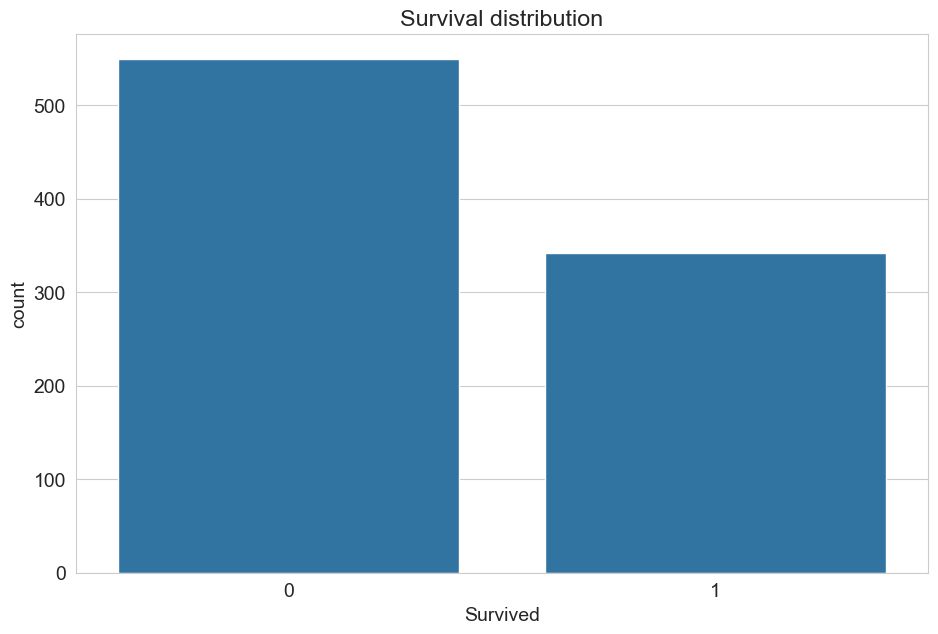

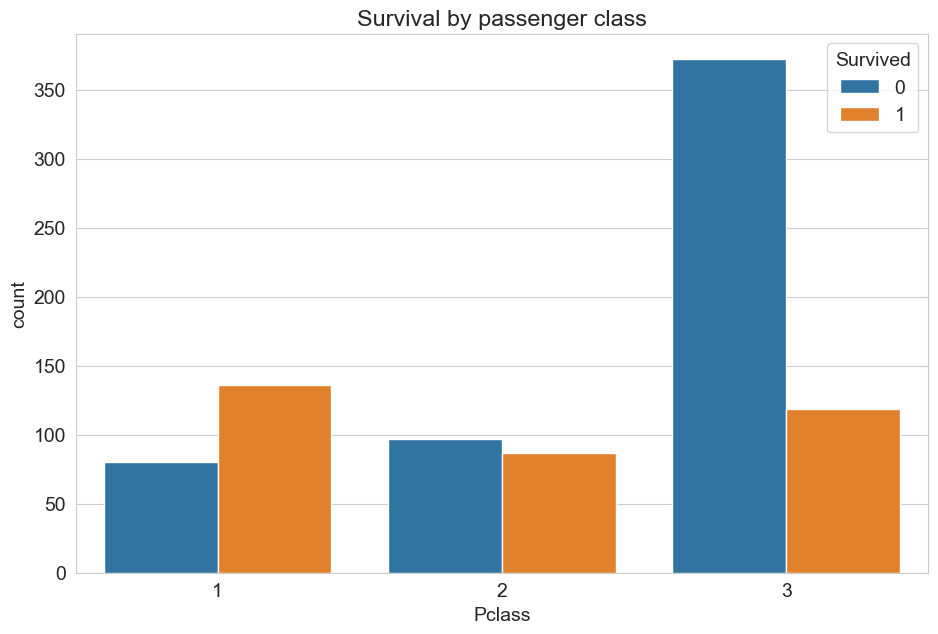

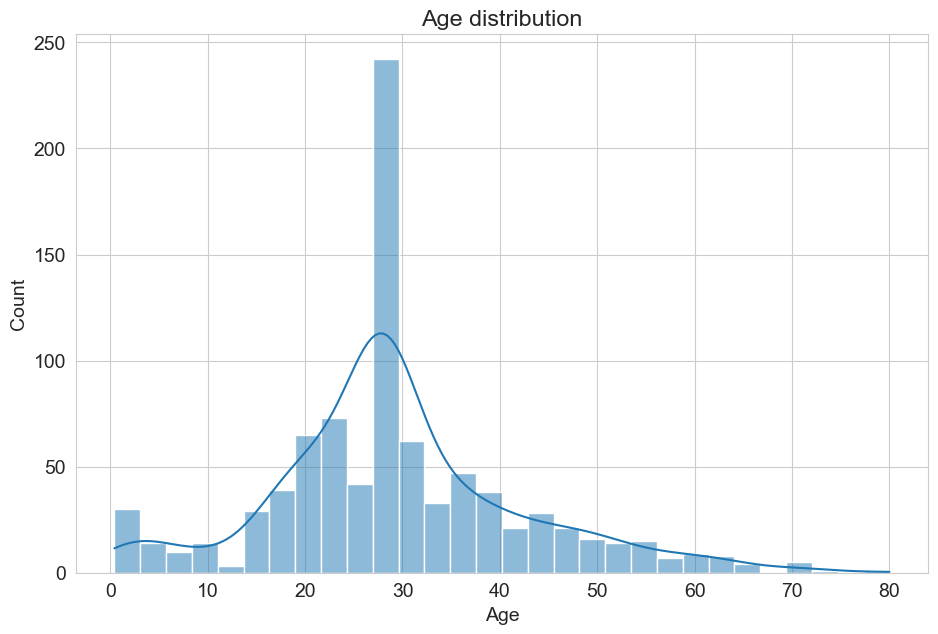

In [5]:
# Step 4: Basic EDA
df.info()
df.describe(include="all")
df.isnull().sum()

## Quick visual checks
sns.countplot(data=df, x="Survived")
plt.title("Survival distribution")
plt.show()

sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title("Survival by passenger class")
plt.show()

sns.histplot(data=df, x="Age", kde=True)
plt.title("Age distribution")
plt.show()




In [6]:
# 2. Separate features and target 
X = df.drop("Survived", axis=1)
y = df["Survived"]


In [7]:
# 3. Split the data in train and test
## train and test data split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 3. Get a quick overview of the train data



# 4. Agree on a classification metric for the task 
Accuracy
Easiest to interpret
Good when classes are not extremely imbalanced
Titanic has ~38% survived vs ~62% died → not too imbalanced

In [8]:
# 5. Create a simple heuristic/educated guess for the classification first. This is called a "baseline model". 

## Baseline A : Predict everyone died
y_pred_baseline = np.zeros_like(y_test)

### Baseline B — Predict based on Sex
#### Predict female → survived and Predict male → died
y_pred_baseline = (X_test["Sex_male"] == 0).astype(int)


In [9]:
# 6. use one or two already numerical features to create a simple first model (did it even beat your base model?)
X_simple = df[["Pclass", "Fare"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X_simple, y, test_size=0.3, random_state=25
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6977611940298507


In [10]:
y_pred_all_died = np.zeros_like(y_test)
acc_all_died = accuracy_score(y_test, y_pred_all_died)
print("Baseline 1 (everyone died) accuracy:", acc_all_died)


Baseline 1 (everyone died) accuracy: 0.6156716417910447


In [15]:
# Baseline 2: predict women survived, men died 
y_pred_sex_rule = (X_test["Sex_male"] == 0).astype(int)
acc_sex_rule = accuracy_score(y_test, y_pred_sex_rule)
print("Baseline 2 (women survive):", acc_sex_rule)


Baseline 2 (women survive): 0.7723880597014925


In [ ]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [12]:
# 7. Now you can go through the data science lifecycle again and again: (clean the data better)
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=25
)


In [13]:
# 8. Stop whenever time is up or you cannot improve your model any further. This repo a solution to this problem. If you want to compare your final result with the result of this repo solution, choose **25** as random seed and a test size of 30% for your train test split.